In [22]:
# Using ! to invoke the following shell command inside our notebook
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [23]:
# The above cell cloned the data from the bitbucket server and created a folder
# called "german-traffic-sign". Now we list the data inside this folder
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


As it can be seen there are 4 files. First one is a spreadsheet of sign name, and the other 3 files are pickle files, that contain our respective training, test and validation datasets.

In python to save something on disk, it can be pickled. That is it can be serialized before writing it to file. By serializing it, it converts all the object to a character stream.

Pickled file contain serialized data that can be unpickled when desired

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [25]:
np.random.seed(0)

In [26]:
# with keyword is used whenever we wish to execute two operations as a pair and
# invoke a block of code in between
# Here using "with", we will open a file, manipulate it and "with" will then
# automatically close the file.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

if we print the type of our pickled datasets using
```
print(type(train_data))
```
we can see they are of type
```
<class 'dict'>
```
From the key value pairs of these dictionaries, two values are of our interest. One of them is *features*, and the other one is *labels*.

Feature key corresponds to values of training images in pixel representation, wherese the labels corresponds to an array of labels, which pretty much label each training image as belonging to some class

In [27]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [28]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


As it can be seen, we have roughly 35000 training images of size 32 by 32 pixels with depth of 3 (as our traffic signs despite the MNIST datasets are in RGB format, they have a depth of 3 for each of the 3 color channels: Red, Green and Blue).

Similarly, there are about 4500 validation and 12500 testing images.

We checked it here to make sure that they are consistent and are based on our expectations.

As we have imported these data from a repository, it is a good practice to verify that our dataset was imported correctly whenever our program is running.

In [29]:
# Assert that the number of images equal to the number of labels.
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"

assert(X_train.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimension of the images are not 32 x 32 x 3"

Now that we ensured that our imported data are accurate, we will plot and analyze our data so thta we can visualize and see how many traffic sign images are present from each class.

The file signnames.csv contains all of traffic sign classes in a csv (comma separated value) format. To manipulate and analyze data in such a csv file, we will use the python data science library called *pandas*.

In any data science project, often times we work with csv files. Today it becomes standard for data scientists to use pandas when importing data from csv files, and we do so using the *read_csv()* function which loads our data from a csv file

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

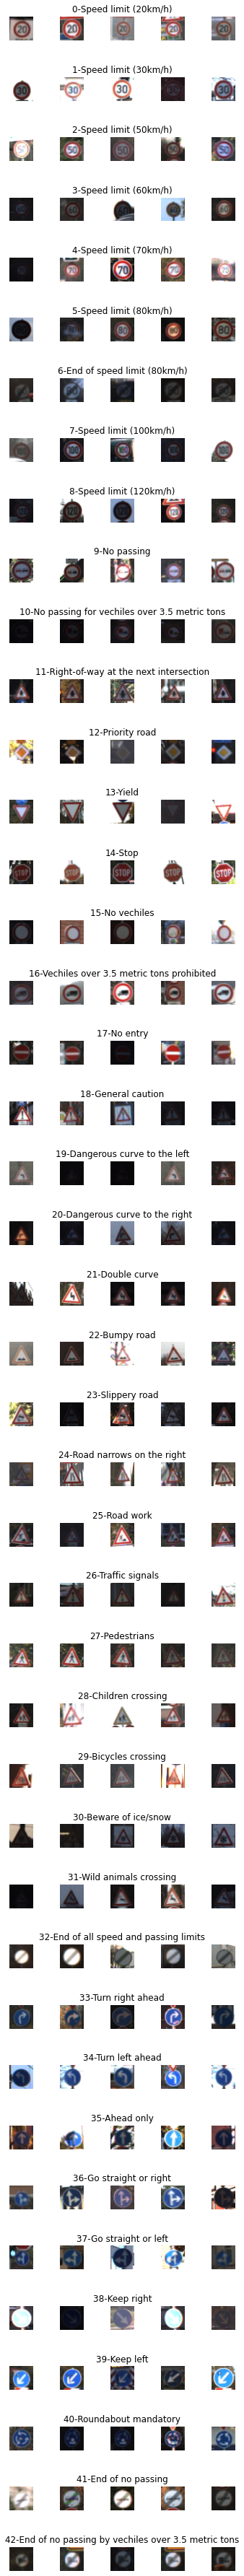

In [31]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

num_of_samples = []
 
cols = 5
num_classes = 43  # 43 calsses available in dataset

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    # Iterate over entire dataframe rows as index and series pairs (index, Series)
    # Each index corresponds to the current index of the class being iterate
    # through, and all of that is being stored in placeholder j
    # Series is a 1 dimensional labeled array, which holds the relevant data for
    #  each row,like the sign name, its respective class and ... this will be
    #  stored in place holder row
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

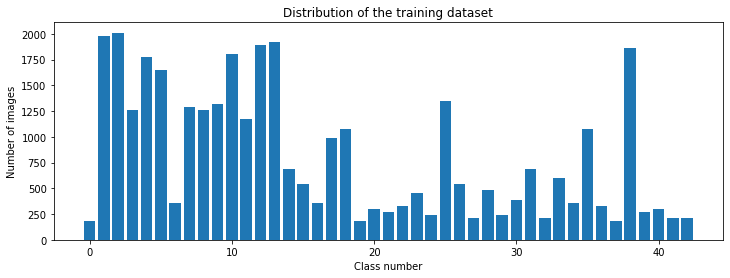

In [32]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

As it can be seen, our traffic sign data is much less uniform than the MNIST dataset that we have used before. Some classes have a larger number of training images belonging to them, while some classes have very little training images.

This means some classes might have less accurate results, as there are less data to train with.

As here the images are RGB with depth of 3 and in contrast with MNIST datasets have different lighting conditions and ..., we need to preprocess them to make them easier for our network to classify them.

(32, 32, 3)
36


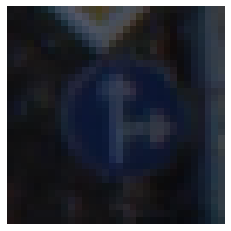

In [33]:
# Preprocessing
import cv2

# Printing an arbitrary image
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)  # To keep track how it changes through preprocessing

# To verify that we have identified the sign correctly. Label value is 36 which
# is consistent with the category for this image (check class number 36 of the
# images in the grid above)
print(y_train[1000])

# 1st preprocessing technique: **convert image to grayscale**

grayscale conversion is important for 2 main reasons:

1- When distinguishing between traffic signs, color is not a very significant feature to look for. The lighting in our images varies, and many of the traffic signs have similar color, reinforcing that it is not a very relevant piece of information. The features of the traffic signs that really matter are edges, curves, shape inside the sign. That's what the network should focus on.

2- When we convert an image from RGB to grayscale, we reduce the depth of our image from 3 to 1. This means that our network now requires fewer parameters as our input data will only have the depth of 1 channel. Therefore, our network will be more efficient, while we require less computing power to classify our data

(32, 32)


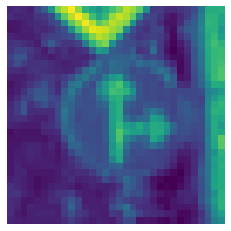

In [34]:
# cv2.cvtColor() converts between different color spaces
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
plt.axis("off")
plt.imshow(img)
print(img.shape)

# 2nd preprocessing technique: **histogram equalization**

It aims to standardize the lighting in all our images. While some images are very bright and some very dim, after histogram equalization, these images will have a similar lighting effect.

Left picture is a histogram of a typical image, which shows the amount of pixels at each brightness value, and as it can be seen, pixel intensities are bunched up around a small range of brightness values. Histogram equalization takes our histogram and spreads it at the ends to get a histogram that covers a higher range of brightness values, and helps to normalize the lighthing on all our images.

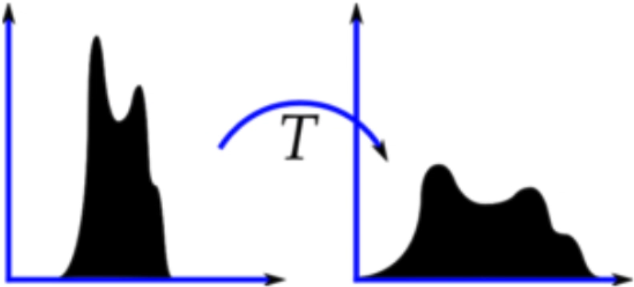

This process also results in a higher contrast within our image, which can help us for feature extraction. It enhances the contrast in image such that any grayscale intensities are now better distributed across the image. At the same time, the emphasizing any pixel intensities that occur at high frequencies. It does so theoretically by flattening the resulted image histogram as it reassigns gray values in the image.

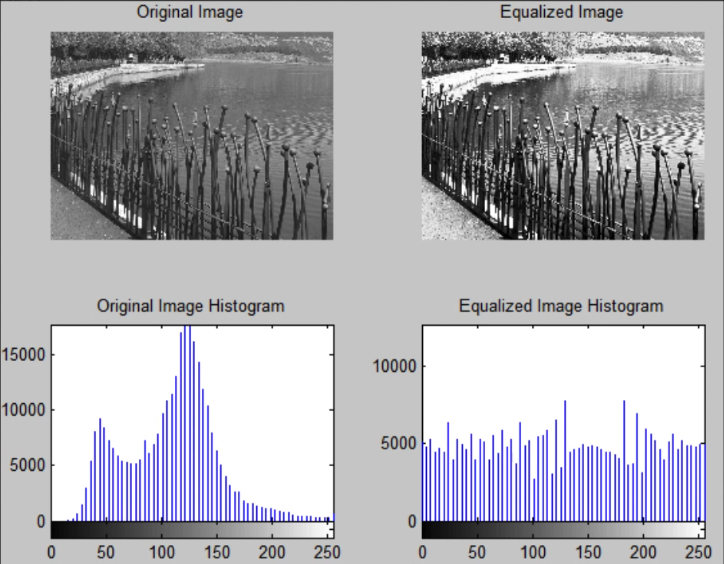


(32, 32)


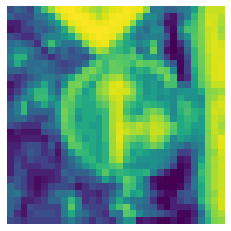

In [35]:
# cv2.equalizeHist() will only accept grayscale images, as they don't have depth
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

Notice the increased contrast and the more defined features, making it easier for our neural network to learn and extract the features. A clear demonstration of the benefit behind the histogram equalization.

**Normalization** is another preprocessign technique that we have used in the past. This is where we divide all the pixel intensities of our image by 255, as we have done in the past. This causes all the pixel values in our image to be normalized between 0 and 1.

Now we apply this technique to all our images.

In [36]:
def preprocessing(img):
    img = grayscale(img)  # convert to grayscale
    img = equalize(img)  # histogram equalization
    img = img / 255  # normalization
    return img

# map() function iterates through the entire array, and for every element of the
# array that it loops through returns a new element based on the specified
# function that executed for each item in the array, ultimately creating a new
# array with updated values
# 1st argument is the function to be applied on the array element
# 2nd argument is the array that the function will be applied on
# map function will return the preprocessed images into the format of a list,
# and therefore we can easily store the returned values in a list
# Finally we need to format the list as an array of images before we can store
# it inside our X_train variable
X_train = np.array(list(map(preprocessing, X_train)))

# Using the same code we can preprocess our validation and test data as well
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


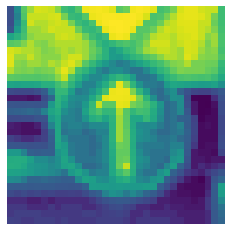

In [37]:
# Plotting some random set of our data to verify that we preprocessed correctly
# randome.randint() Will return a random integer between the selected range
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(X_train.shape)

Next step to prepare our data for CNN, is to add depth to our data.

At the moment each image is 2D and doesn't have a depth, but as we can recall, the way that CNN work is by applying a filter to the channels of the image that's being viewed.

In case of grayscale image, there is one channel available. Therefore, our data must present that depth.

In [38]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [39]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


The final step in preparing our data for use is to 1 hot encode our data labels.

In [40]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

## LeNet implementation

In [45]:
def leNet_model():
    model = Sequential()

    # Filter size is chosen as 5x5 because the image size are relatively similar
    # to MNIST dataset. Here they are 32x32, and in MNIST 28x28
    # There is no need to preserve the borders, since looking at the traffic
    # sign images, they seem to be centralized. So, the borders don't really
    # contain any significant features that are necessary for the nerual network
    # to learn.
    model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd convolutional layer includes 15 filters and as the input images are
    # smaller, smaller filters are used to extract features: (3, 3)
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flattening our data to format properly so that it can be fed into a fully
    # connected layer as a 1D array. It will convert the 6x6x15 to a 1x540 array
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))  # 0.5 is the recommended fraction
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(Adam(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [47]:
model = leNet_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)              

Note the dimension of each layer and their relation to the previous layers:

A pooling size of 2, will result in an output of size 1/2

Input image size will be reduced by 2 pixels in each side, when the filter size is 5x5

The depth will be preserved in the pooling, but convolution will result in a depth equal to the number of filters

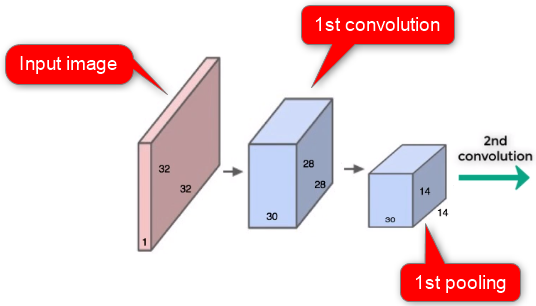

In [52]:
# Model training and performance evaluation
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
87/87 [==============================] - 1s 10ms/step - loss: 0.1433 - accuracy: 0.9518 - val_loss: 0.3501 - val_accuracy: 0.9161
Epoch 2/10
87/87 [==============================] - 1s 9ms/step - loss: 0.1333 - accuracy: 0.9547 - val_loss: 0.3792 - val_accuracy: 0.9107
Epoch 3/10
87/87 [==============================] - 1s 9ms/step - loss: 0.1341 - accuracy: 0.9543 - val_loss: 0.3292 - val_accuracy: 0.9209
Epoch 4/10
87/87 [==============================] - 1s 9ms/step - loss: 0.1246 - accuracy: 0.9585 - val_loss: 0.3520 - val_accuracy: 0.9170
Epoch 5/10
87/87 [==============================] - 1s 9ms/step - loss: 0.1232 - accuracy: 0.9578 - val_loss: 0.3944 - val_accuracy: 0.9093
Epoch 6/10
87/87 [==============================] - 1s 8ms/step - loss: 0.1241 - accuracy: 0.9573 - val_loss: 0.3923 - val_accuracy: 0.9145
Epoch 7/10
87/87 [==============================] - 1s 9ms/step - loss: 0.1194 - accuracy: 0.9592 - val_loss: 0.3628 - val_accuracy: 0.9136
Epoch 8/10
87/87 [=

Text(0.5, 0, 'epoch')

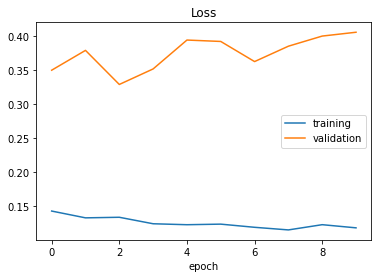

In [53]:
# Plotting data to get a visual representation of it, and analyze how the
# network performed
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

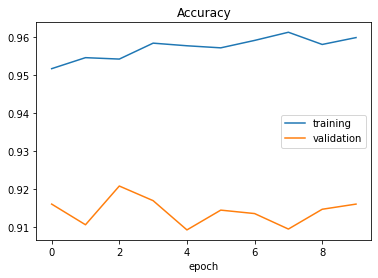

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [57]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.5934001803398132
Test Accuracy: 0.8955661058425903


As it can be seen, our network is not performing effectively in terms of accurately predicting images from the dataset.

Futhermroe, our network seems to have overfitter our data as well.

It can also be seen, that our network is not at the pick performance, and has a relatively low accuracy rating.

Therefore, we must fine tune our model to improve its performance.

So, our very same LeNet model that performed very well in the MNIST dataset, has some issues here as the traffic sign dataset is more challenging.

We have two main issues:


1.   Accuracy is not as high as we would like
2.   Network seems to be overfitting our training data



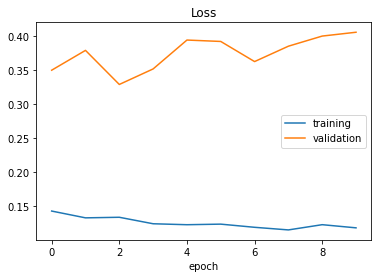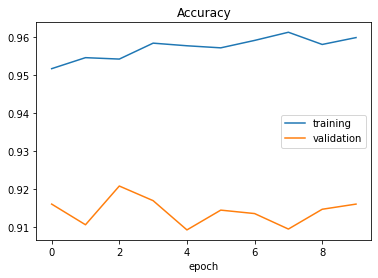

# Fine-tuning Model

We have two main problems:
1.   Low accuracy
2.   Overfitted network

The 1st issue can be tackled using a variaty of modifications to our LeNet model code. Keep in mind that these modifications are case-dependent, and fine-tuning is often a very specific process that is unique for each deep learning task. However, fine-tuning our model is important and can often times improve our model's performance siginificantly. Therefore, allways try to modify the model to see how these modifications improve the effectiveness of the model. When it comes to improving accuracy, the lecturer's experience results in the following modifications.

1- Although *Adam* optimizer computes individual adaptive learning rates, it is important to specify a feeding initial learning rate for optimal performance. A high learning rate can often lead to lower accuracy. However, a lower learning rate can help a neural network learn more effectively, when a more complex dataset is involved.

Therefore: learning_rate=0.01 ==> learning_rate=0.001

With these modification training accuracy is changed from 0.9600 to 0.9877

Validation accuracy is also changed from 0.9161 to 0.9374

Evaluating the plots, we can see that our model is still overfitting, as validation accuracy is below training accuracy.

It also shows that the test accuracy also increased slightly from 0.8955661058425903 to 0.9204275608062744


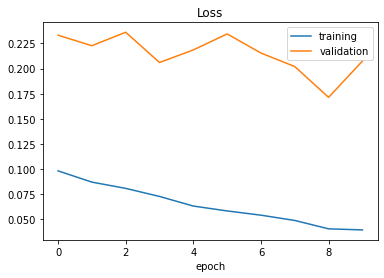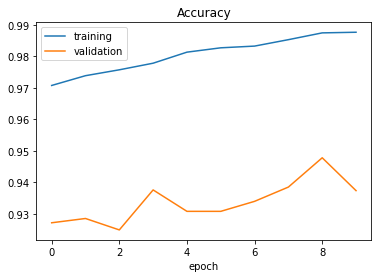


2- The number of filters inside the convolutional layer can be increased to help our network extract more features from the images and can result in improved accuracy. 30 ==> 60 in the first layer, and 15 ==> 30 in the second layer. As it can be seen from the model summary, the number of parameters is increased.

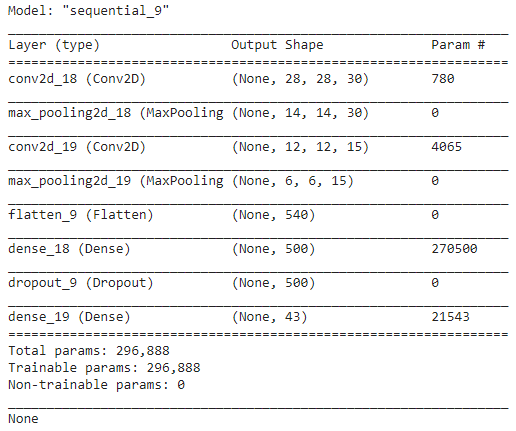

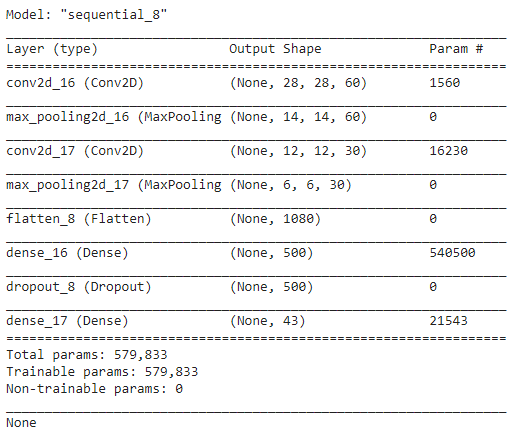

The outcome is:

Training accuracy: 0.9810

Validation accuracy: 0.9401

Evaluating the plots, we can still see that our model is overfitting, as the validataion accuracy is below the training accuracy

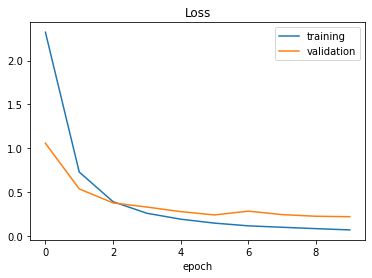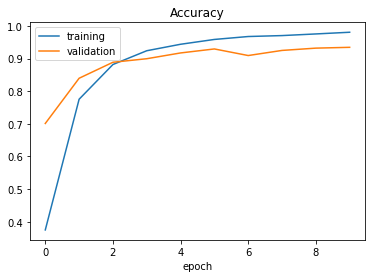


3- We can add extrac convolutional layers as well to help our network to extract features more effectively, and can also lead to improved accuracy.

As it can be seen, our convolutional layers come with their own parameters, which means that more computing power is required, when these layers are added. However, a very interesting point to note is that while these additional layers introduced their own parameters, the total number of parameters decreased. The reason for this is that with each convolutional layer, the dimension of our image decrease. This means that by the time that our image data reaches our fully connected layers it has much smaller dimensions. This results in fewer parameters within the fully connected layer which results in less overal parameters in our model. Therefore, with this modification our model requires less computing power and will potentially improve accuracy.

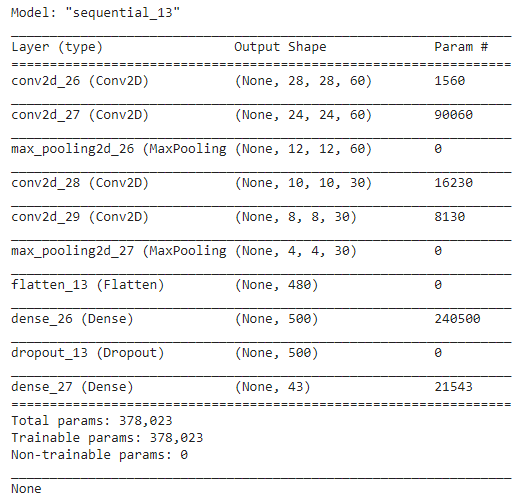

The outcome is:

Training accuracy: 0.9869

Validation accuracy: 0.9714

Test accuracy: 0.9463974833488464

Evaluating the plots, we can still see that our model is overfitting, as the validataion accuracy is below the training accuracy

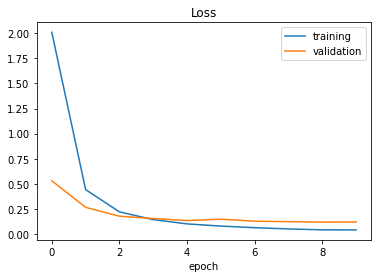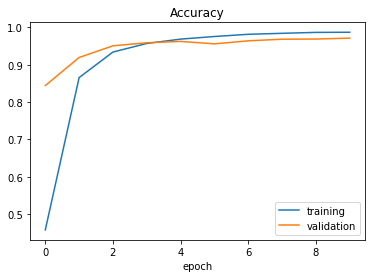

4- Now the accuracy is acceptable, but we still face overfitting issue. Here we add another dropout layer. Using more than 1 dropout layer is common and can be a very effective technique.

The outcome is:

Training accuracy: 0.9653

Validation accuracy: 0.9771

Test accuracy: 0.9612034559249878

Therefore, while the validation and test accuracy increased, training accuracy is suffered. However all of them are now relatively high.

The good news is that as it can be seen from the following plots, our overfitting issue is resolved.

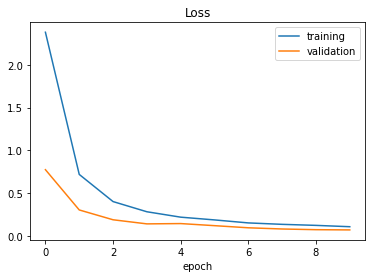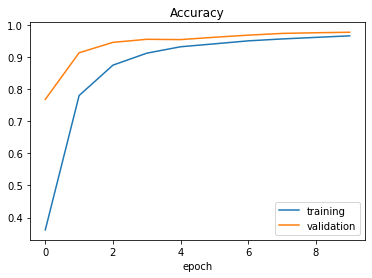

In [108]:
def leNet_model_fine_tune():
    model = Sequential()

    # Filter size is chosen as 5x5 because the image size are relatively similar
    # to MNIST dataset. Here they are 32x32, and in MNIST 28x28
    # There is no need to preserve the borders, since looking at the traffic
    # sign images, they seem to be centralized. So, the borders don't really
    # contain any significant features that are necessary for the nerual network
    # to learn.
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd convolutional layer includes 15 filters and as the input images are
    # smaller, smaller filters are used to extract features: (3, 3)
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))  # 0.5 is the recommended fraction
    
    # Flattening our data to format properly so that it can be fed into a fully
    # connected layer as a 1D array. It will convert the 6x6x15 to a 1x540 array
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))  # 0.5 is the recommended fraction
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [109]:
model_fine_tune = leNet_model_fine_tune()
print(model_fine_tune.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 4, 4, 30)        

In [110]:
# Model training and performance evaluation
history_fine_tune = model_fine_tune.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
87/87 [==============================] - 4s 31ms/step - loss: 3.1326 - accuracy: 0.1794 - val_loss: 0.7748 - val_accuracy: 0.7680
Epoch 2/10
87/87 [==============================] - 2s 26ms/step - loss: 0.8679 - accuracy: 0.7378 - val_loss: 0.3048 - val_accuracy: 0.9132
Epoch 3/10
87/87 [==============================] - 2s 27ms/step - loss: 0.4439 - accuracy: 0.8624 - val_loss: 0.1901 - val_accuracy: 0.9456
Epoch 4/10
87/87 [==============================] - 2s 26ms/step - loss: 0.3049 - accuracy: 0.9044 - val_loss: 0.1421 - val_accuracy: 0.9551
Epoch 5/10
87/87 [==============================] - 2s 27ms/step - loss: 0.2272 - accuracy: 0.9294 - val_loss: 0.1457 - val_accuracy: 0.9542
Epoch 6/10
87/87 [==============================] - 2s 26ms/step - loss: 0.1894 - accuracy: 0.9400 - val_loss: 0.1213 - val_accuracy: 0.9615
Epoch 7/10
87/87 [==============================] - 2s 26ms/step - loss: 0.1539 - accuracy: 0.9502 - val_loss: 0.0964 - val_accuracy: 0.9680
Epoch 8/10
87

Text(0.5, 0, 'epoch')

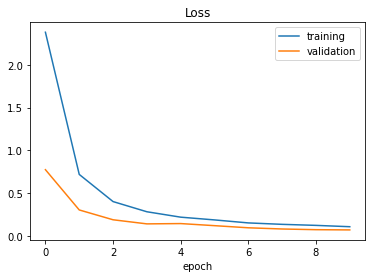

In [111]:
# Plotting data to get a visual representation of it, and analyze how the
# network performed
plt.plot(history_fine_tune.history['loss'])
plt.plot(history_fine_tune.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

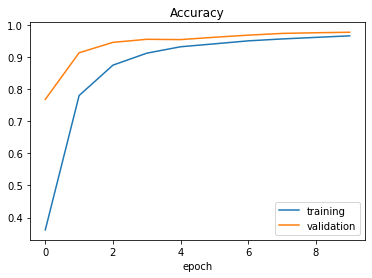

In [112]:
plt.plot(history_fine_tune.history['accuracy'])
plt.plot(history_fine_tune.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [113]:
score_fine_tune = model_fine_tune.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score_fine_tune[0])
print('Test Accuracy:', score_fine_tune[1])

Test Score: 0.13802538812160492
Test Accuracy: 0.9612034559249878
